In [1]:
import numpy as np
import pandas as pd  # for data analytics
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
import numpy as np
import pandas as pd  # for data analytics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import csv
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install openpyxl

In [4]:
import statsmodels.api as sm
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
from statsmodels.discrete.discrete_model import MNLogit 
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [5]:
import pandas as pd

# Load the dataset
file_path = '/Users/rohandhawlagar/Documents/All Brands including Gardein.xlsx'
data = pd.read_excel(file_path)

In [6]:
# Creating Total Dollar and Sales Volume columns
data['Total Unit Sales'] = data['Base Unit Sales'] + data['Incremental Units']
data['Total Volume Sales'] = data['Base Volume Sales'] + data['Incremental Volume']
data['Total Dollar Sales'] = data['Base Dollar Sales'] + data['Incremental Dollars']

In [7]:
data.dtypes

Geography                     object
Time                          object
Date                  datetime64[ns]
Month                         object
Year                           int64
                           ...      
Type Of Substitute            object
Cooked Info                   object
Total Unit Sales             float64
Total Volume Sales           float64
Total Dollar Sales           float64
Length: 75, dtype: object

In [8]:
data.shape

(991780, 75)

In [9]:
# Filtering total US data
filtered_data = data.loc[data['Geography']!='Total US - Multi Outlet + Conv']

In [10]:
# Grouping data and identifying total quantity
filtered_data_grouped = filtered_data.groupby(['Geography', 'Maufacturer Name', 'Form', 'Year', 'Price per Unit']).\
agg({'Total Dollar Sales': 'sum', 'Total Volume Sales': 'sum', 'Total Unit Sales': 'sum'})

filtered_data_grouped.reset_index()

,Geography,Maufacturer Name,Form,Year,Price per Unit,Total Dollar Sales,Total Volume Sales,Total Unit Sales
0,California - Standard - Multi Outlet + Conv,ABBOTS BUTCHER INC,GROUND,2021,4.826066,294.390000,38.125000,61.000000
1,California - Standard - Multi Outlet + Conv,ABBOTS BUTCHER INC,GROUND,2021,4.990000,0.000000,0.000000,0.000000
2,California - Standard - Multi Outlet + Conv,ABBOTS BUTCHER INC,GROUND,2021,4.990000,1287.420000,161.250000,258.000000
3,California - Standard - Multi Outlet + Conv,ABBOTS BUTCHER INC,GROUND,2021,5.721707,234.590000,25.625000,41.000000
4,California - Standard - Multi Outlet + Conv,ABBOTS BUTCHER INC,GROUND,2021,6.418571,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
681751,West - Standard - Multi Outlet + Conv,WORLD FINER FOODS INC,Other Forms,2024,3.800414,0.000000,0.000000,0.000000
681752,West - Standard - Multi Outlet + Conv,WORLD FINER FOODS INC,Other Forms,2024,3.935299,40.621344,5.161150,10.322301
681753,West - Standard - Multi Outlet + Conv,WORLD FINER FOODS INC,Other Forms,2024,4.073014,0.000000,0.000000,0.000000
681754,West - Standard - Multi Outlet + Conv,WORLD FINER FOODS INC,Other Forms,2024,4.313322,28.498520,3.303547,6.607094


In [11]:
filtered_data.shape

(824367, 75)

In [12]:
Dummydata = filtered_data_grouped
print(Dummydata.columns)

Index(['Total Dollar Sales', 'Total Volume Sales', 'Total Unit Sales'], dtype='object')


In [13]:
Dummydata.reset_index()
Dummy_upd = Dummydata.reset_index()




Dummy_upd['Form_upd'] = np.select([Dummy_upd['Form'] == 'GROUND', 
                                   Dummy_upd['Form'] == 'BURGER PATTY', 
                                   Dummy_upd['Form'] == 'BURGER',
                                   Dummy_upd['Form'] == 'FILET',
                                   Dummy_upd['Form'] == 'LINK',
                                   Dummy_upd['Form'] == 'TENDER',
                                   Dummy_upd['Form'] == 'Other Forms'], 
                                  [ 0, 1, 2, 3, 4, 5, 6 ], default=6)


Dummy_upd['Geo_upd'] = np.select([Dummy_upd['Geography'] == 'Great Lakes - Standard - Multi Outlet + Conv', 
                                           Dummy_upd['Geography'] == 'California - Standard - Multi Outlet + Conv',
                                            Dummy_upd['Geography'] == 'Mid-South - Standard - Multi Outlet + Conv',
                                            Dummy_upd['Geography']=='Northeast - Standard - Multi Outlet + Conv',
                                            Dummy_upd['Geography']=='Plains - Standard - Multi Outlet + Conv',
                                            Dummy_upd['Geography']=='South Central - Standard - Multi Outlet + Conv',
                                            Dummy_upd['Geography']=='Southeast - Standard - Multi Outlet + Conv',
                                            Dummy_upd['Geography'] == 'West - Standard - Multi Outlet + Conv'], 
                                            [ 0, 1, 2, 3, 4, 5, 6, 7], default=8)

In [14]:
Dummy_upd= Dummy_upd.rename(columns={'Total Unit Sales': 'Total_Unit_Sales'})
Dummy_upd=Dummy_upd.rename(columns={'Base Unit Sales': 'Base_Unit_Sale'})
Dummy_upd=Dummy_upd.rename(columns={'Price per Unit': 'Price_per_unit'})
Dummy_upd=Dummy_upd.rename(columns={'Total Dollar Sales': 'Total_Dollar_Sales'})

In [15]:
#Subset Data for only Conagra
Dummy_upd_Conagra = Dummy_upd.loc[Dummy_upd['Maufacturer Name'] == 'CONAGRA BRANDS']

In [16]:
Dummy_upd_Conagra.reset_index()
import statsmodels.api as sm
# Define the categorical variables and their reference categories
Dummy_upd_Conagra.loc[:, 'Form_upd'] = pd.Categorical(Dummy_upd_Conagra['Form_upd'], categories=[0, 1, 2, 3, 4, 5, 6], ordered=True)
Dummy_upd_Conagra.loc[:, 'Geo_upd'] = pd.Categorical(Dummy_upd_Conagra['Geo_upd'], categories=[0, 1, 2, 3, 4,5,6,7], ordered=True)

Dummy_upd_Conagra.loc[:, 'Form_upd'] = Dummy_upd_Conagra['Form_upd'].cat.rename_categories(['GROUND', 'BURGER PATTY', 'BURGER', 'FILET', 'LINK', 'TENDER', 'Other Forms'])
Dummy_upd_Conagra.loc[:, 'Geo_upd'] = Dummy_upd_Conagra['Geo_upd'].cat.rename_categories(['Great lakes', 'California', 'Mid-South', 'Northeast', 'Plains', 'South Central', 'Southeast', 'West'])


# Fit the   with the specified predictors and reference categories
model2 = sm.formula.glm('Total_Unit_Sales ~  Price_per_unit + np.power(Price_per_unit, 2) + Form_upd + Geo_upd + Geo_upd:Form_upd', 
                       data=Dummy_upd_Conagra, family=sm.families.Gaussian()).fit()

# Print the model summary
print(model2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:       Total_Unit_Sales   No. Observations:                61262
Model:                            GLM   Df Residuals:                    61204
Model Family:                Gaussian   Df Model:                           57
Link Function:               Identity   Scale:                      4.8700e+06
Method:                          IRLS   Log-Likelihood:            -5.5857e+05
Date:                Thu, 02 May 2024   Deviance:                   2.9806e+11
Time:                        12:14:37   Pearson chi2:                 2.98e+11
No. Iterations:                     3   Pseudo R-squ. (CS):             0.5099
Covariance Type:            nonrobust                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [17]:
#Subset Data for Top 5 Brands
Dummy_upd_Top5 = Dummy_upd[Dummy_upd['Maufacturer Name'].isin
                           (['CONAGRA BRANDS',"KELLANOVA", 'BEYOND MEAT INC', 'IMPOSSIBLE FOODS INC', 'PRIVATE LABEL'])]

In [18]:
sales_sum2 = Dummy_upd_Top5.groupby('Form_upd')['Total_Unit_Sales'].sum()

# Print the sum of total dollar sales for each CAG form type
print(sales_sum2)

Form_upd
0    6.356452e+07
1    5.434796e+07
2    8.483863e+07
3    1.195214e+07
4    5.365133e+07
5    2.661386e+07
6    3.178250e+08
Name: Total_Unit_Sales, dtype: float64


In [19]:
Dummy_upd.reset_index()
import statsmodels.api as sm
# Define the categorical variables and their reference categories
Dummy_upd_Top5.loc[:, 'Form_upd'] = pd.Categorical(Dummy_upd_Top5['Form_upd'], categories=[0, 1, 2, 3, 4, 5, 6], ordered=True)
Dummy_upd_Top5.loc[:, 'Geo_upd'] = pd.Categorical(Dummy_upd_Top5['Geo_upd'], categories=[0, 1, 2, 3, 4,5,6,7], ordered=True)

Dummy_upd_Top5.loc[:, 'Form_upd'] = Dummy_upd_Top5['Form_upd'].cat.rename_categories(['GROUND', 'BURGER PATTY', 'BURGER', 'FILET', 'LINK', 'TENDER', 'Other Forms'])
Dummy_upd_Top5.loc[:, 'Geo_upd'] = Dummy_upd_Top5['Geo_upd'].cat.rename_categories(['Great lakes', 'California', 'Mid-South', 'Northeast', 'Plains', 'South Central', 'Southeast', 'West'])


# Fit the   with the specified predictors and reference categories
model = sm.formula.glm('Total_Unit_Sales ~ Price_per_unit + np.power(Price_per_unit, 2) + Form_upd + Geo_upd + Geo_upd:Form_upd', 
                       data=Dummy_upd_Top5, family=sm.families.Gaussian()).fit()

# Print the model summary
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:       Total_Unit_Sales   No. Observations:               261928
Model:                            GLM   Df Residuals:                   261870
Model Family:                Gaussian   Df Model:                           57
Link Function:               Identity   Scale:                      1.8669e+07
Method:                          IRLS   Log-Likelihood:            -2.5643e+06
Date:                Thu, 02 May 2024   Deviance:                   4.8889e+12
Time:                        12:14:40   Pearson chi2:                 4.89e+12
No. Iterations:                     3   Pseudo R-squ. (CS):            0.05595
Covariance Type:            nonrobust                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------

Index(['Geography', 'Time', 'Date', 'Month', 'Year', 'Product', 'UPC 13 digit',
       'Maufacturer Name', 'Brand Franchise Name', 'Brand Name', 'Unit Sales',
       'Unit Sales No Merch', 'Unit Sales Any Merch',
       'Unit Sales Price Reductions Only', 'Unit Sales Feature Only',
       'Unit Sales Display Only', 'Unit Sales Special Pack Only',
       'Unit Sales Feature and Display', 'Volume Sales',
       'Volume Sales No Merch', 'Volume Sales Any Merch',
       'Volume Sales Price Reductions Only', 'Volume Sales Feature Only',
       'Volume Sales Display Only', 'Volume Sales Special Pack Only',
       'Volume Sales Feature and Display', 'Dollar Sales',
       'Dollar Sales No Merch', 'Dollar Sales Any Merch',
       'Dollar Sales Price Reductions Only', 'Dollar Sales Feature Only',
       'Dollar Sales Display Only', 'Dollar Sales Special Pack Only',
       'Dollar Sales Feature and Display', 'Price per Unit',
       'Price per Unit No Merch', 'Price per Unit Any Merch',
       '

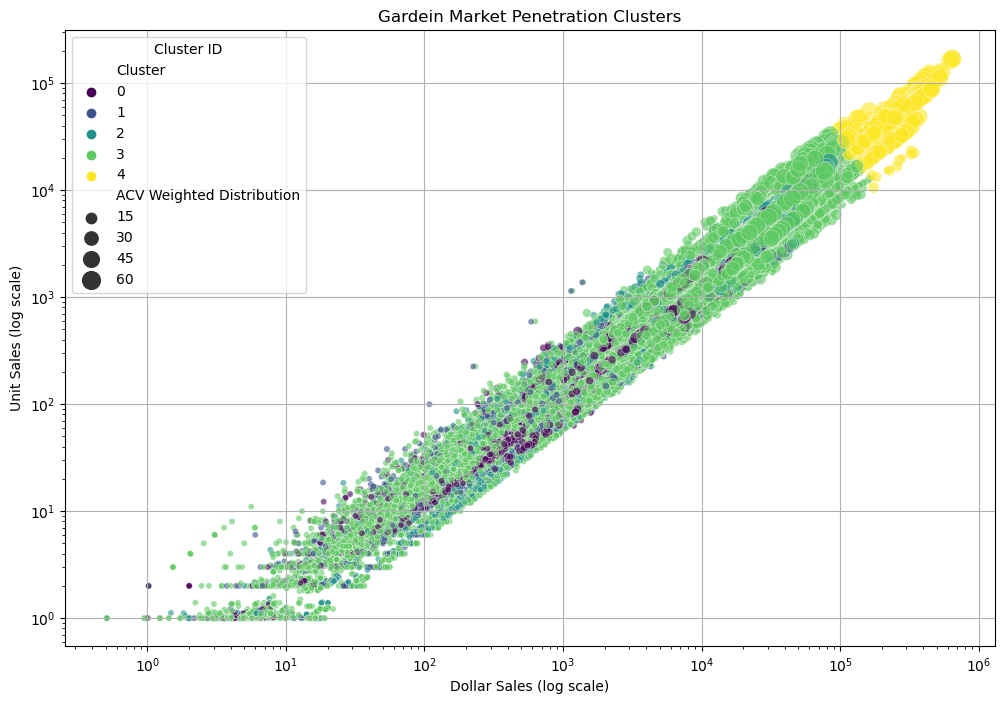

Cluster 0 Key Metrics:
       Dollar Sales   Unit Sales  ACV Weighted Distribution
count   7341.000000  7341.000000                7341.000000
mean    3728.070514   708.015063                  12.107567
min        0.510000     1.000000                   0.001677
25%      309.030589    49.336757                   1.345021
50%     1641.623563   305.350765                   6.944529
75%     4885.382084   920.694766                  18.378852
max    30775.513526  7427.229644                  55.615185
std     4978.405115  1031.489665                  13.385854
Top Products in Cluster 0:
Product
GARDEIN FROZEN REGULAR MEAT SUBSTITUTE GROUND 13.7 OZ - 0842234000981                    4.284225e+06
GARDEIN FROZEN SEVEN GRAIN PLANT BASED CHICKEN SUBSTITUTE TENDER 9 OZ - 0842234000521    2.494185e+06
GARDEIN FROZEN REGULAR MEAT SUBSTITUTE MEATBALL 12.7 OZ - 0842234000971                  2.358203e+06
Name: Dollar Sales, dtype: float64
Cluster 1 Key Metrics:
       Dollar Sales    Unit Sales  ACV

In [20]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_excel('/Users/rohandhawlagar/Documents/All Brands including Gardein.xlsx')

# Print column names to verify the correct column name for brand
print(data.columns)

# Assuming the column is named 'Brand Name'
gardein_data = data[data['Brand Name'].str.contains('GARDEIN', case=False, na=False)]

# Selecting relevant features for clustering
features = gardein_data[['ACV Weighted Distribution', 'Dollar Sales', 'Unit Sales', 'Geography']]
features.dropna(inplace=True)  # Dropping missing values

# Handling categorical data (Geographic data)
features = pd.get_dummies(features, columns=['Geography'])

# Scaling the data
scaler = StandardScaler()

# Setting up K-means clustering
kmeans = KMeans(n_clusters=5, random_state=0)

# Create a pipeline
pipeline = make_pipeline(scaler, kmeans)

# Fit the model
pipeline.fit(features)

# Predict the clusters
clusters = pipeline.predict(features)

# Add the cluster data back to the Gardein dataframe
gardein_data['Cluster'] = clusters

# Visualize the results with enhanced scatter plot using Seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Dollar Sales', y='Unit Sales', hue='Cluster', data=gardein_data, palette='viridis', size='ACV Weighted Distribution', sizes=(20, 200), alpha=0.6, edgecolor='w')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Dollar Sales (log scale)')
plt.ylabel('Unit Sales (log scale)')
plt.title('Gardein Market Penetration Clusters')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

# Printing key metrics and top products for each cluster
for i in range(kmeans.n_clusters):
    cluster_data = gardein_data[gardein_data['Cluster'] == i]
    print(f"Cluster {i} Key Metrics:")
    print(cluster_data.describe()[['Dollar Sales', 'Unit Sales', 'ACV Weighted Distribution']])
    top_products = cluster_data.groupby('Product')['Dollar Sales'].sum().nlargest(3)
    print(f"Top Products in Cluster {i}:")
    print(top_products)


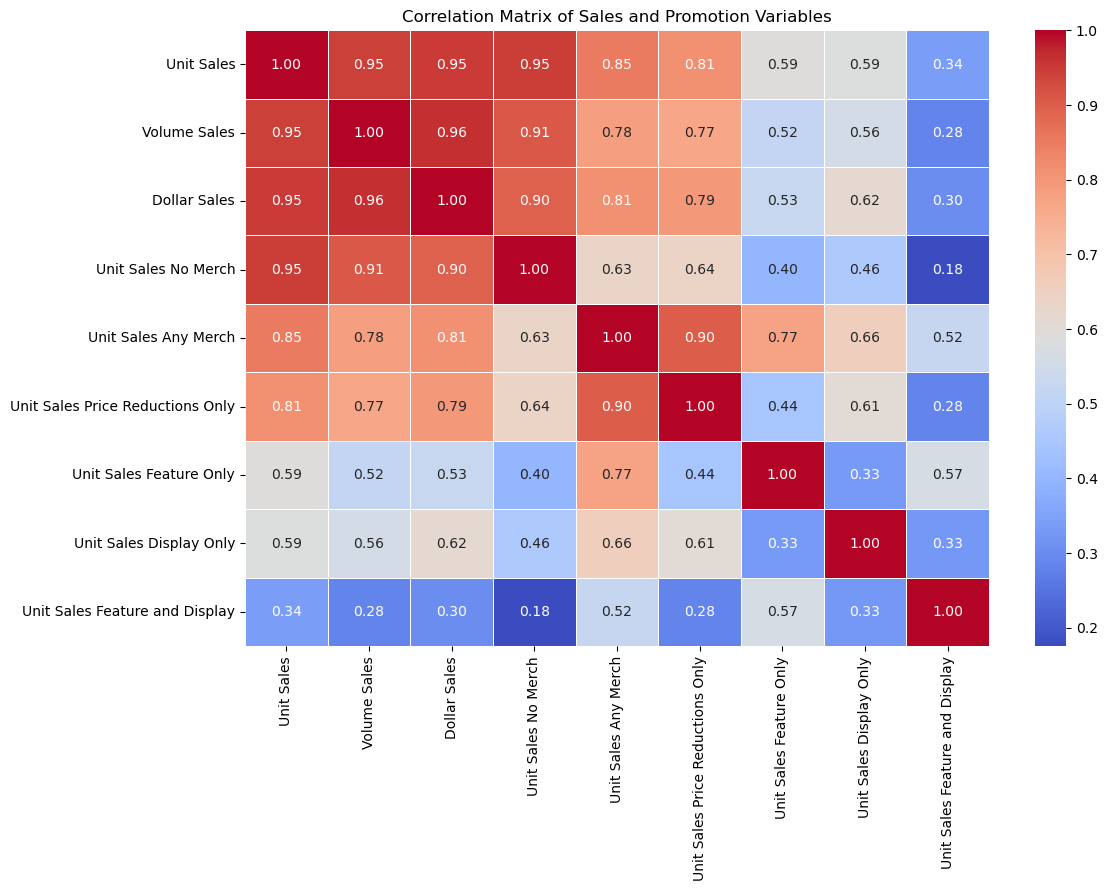

Linear Regression - MSE: 134668945.81917417, R2: 0.9100101829098802
Random Forest - MSE: 105663807.02530451, R2: 0.9293922840977714


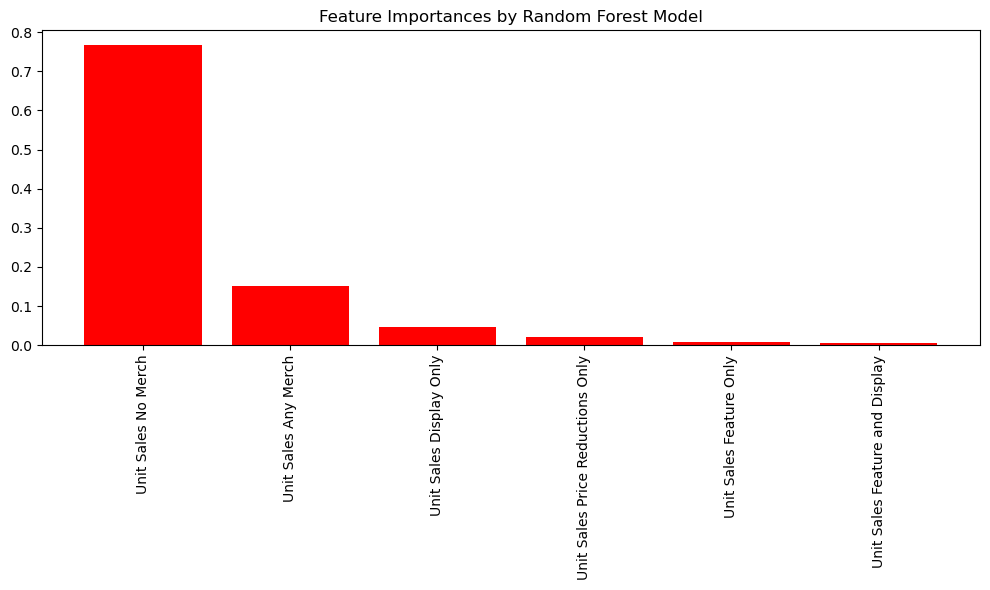

In [21]:
#

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define the file path
filepath = '/Users/rohandhawlagar/Documents/All Brands including Gardein.xlsx'

# Function to load and clean data
def load_and_clean_data(filepath):
    data = pd.read_excel(filepath)
    data.dropna(axis=1, how='all', inplace=True)  # Drop columns that are completely empty
    data.fillna(data.median(numeric_only=True), inplace=True)  # Fill numeric columns with the median
    for col in data.select_dtypes(include='object').columns:  # Convert categorical to category dtype
        data[col] = data[col].astype('category')
    return data

# Correlation Analysis
def correlation_analysis(data):
    correlation_columns = ['Unit Sales', 'Volume Sales', 'Dollar Sales', 'Unit Sales No Merch', 
                           'Unit Sales Any Merch', 'Unit Sales Price Reductions Only', 
                           'Unit Sales Feature Only', 'Unit Sales Display Only', 
                           'Unit Sales Feature and Display']
    correlation_matrix = data[correlation_columns].corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Matrix of Sales and Promotion Variables')
    plt.show()

# Regression and Random Forest Model Analysis
def model_analysis(data):
    X = data[['Unit Sales No Merch', 'Unit Sales Any Merch', 'Unit Sales Price Reductions Only', 
              'Unit Sales Feature Only', 'Unit Sales Display Only', 'Unit Sales Feature and Display']]
    y = data['Dollar Sales']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Linear Regression
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    y_pred_lr = linear_model.predict(X_test)
    print(f"Linear Regression - MSE: {mean_squared_error(y_test, y_pred_lr)}, R2: {r2_score(y_test, y_pred_lr)}")

    # Random Forest
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    print(f"Random Forest - MSE: {mean_squared_error(y_test, y_pred_rf)}, R2: {r2_score(y_test, y_pred_rf)}")

    # Feature Importance
    feature_importance(rf_model, X_train)

# Feature Importance Visualization
def feature_importance(model, features):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.title('Feature Importances by Random Forest Model')
    plt.bar(range(len(importances)), importances[indices], color='r', align='center')
    plt.xticks(range(len(importances)), features.columns[indices], rotation=90)
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    data = load_and_clean_data(filepath)
    correlation_analysis(data)
    model_analysis(data)
